# House Price Prediction: A Machine Learning Tutorial

This notebook guides you through predicting house prices using machine learning. We'll use the California Housing dataset for regression.

**Objectives:**
- Perform Exploratory Data Analysis (EDA).
- Preprocess the data.
- Select and train models.
- Evaluate performance and iterate.

**Dataset:** California Housing from scikit-learn 

**Libraries Used:** numpy, pandas, scikit-learn, matplotlib, seaborn.

In [13]:
# Useful Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

We'll fetch the California Housing dataset. It includes:
- Features: MedInc (median income), HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude.
- Target: MedHouseVal (median house value).


In [15]:
# Define column names (from the UCI dataset description)
column_names = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households", "median_income", "median_house_value"
]

# Load the data
df = pd.read_csv("CaliforniaHousing/cal_housing.data", header=None, names=column_names)

# Display a preview
print(df.head())
print(df.info())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  
0       322.0       126.0         8.3252            452600.0  
1      2401.0      1138.0         8.3014            358500.0  
2       496.0       177.0         7.2574            352100.0  
3       558.0       219.0         5.6431            341300.0  
4       565.0       259.0         3.8462            342200.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------   

In [16]:
print(df.shape)
df.describe()

(20640, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis (EDA)


Visualize distributions, correlations, and outliers to understand the data.

**Features (based on output):**
- `longitude`, `latitude`: Geographic coordinates.
- `housing_median_age`: Median age of houses.
- `total_rooms`, `total_bedrooms`: Total rooms/bedrooms in a block.
- `population`, `households`: Population and households in a block.
- `median_house_value`: Target variable (house value in $).
- (Possibly) `median_income`: Median income in the block.
- (Possibly) `ocean_proximity`: Categorical (Kaggle version).

Steps:
- Check missing values (already confirmed none).
- Visualize target distribution.
- Explore feature distributions and correlations.
- Identify outliers.

Lets visualize and analyze data to spot patterns, correlations, outliers.

In [17]:
# Check missing values
missing = df.isnull().sum()
print("Missing Values:\n", missing)

Missing Values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


no missing data (all 0). If there were, we'd handle in preprocessing.

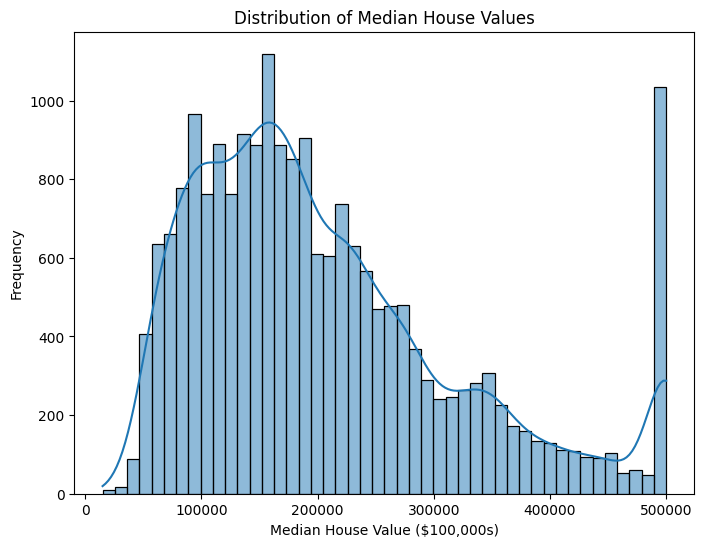

In [19]:
# Plot target distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['median_house_value'], kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Median House Value ($100,000s)')
plt.ylabel('Frequency')
plt.show()

no missing data (all 0). If there were, we'd handle in preprocessing.

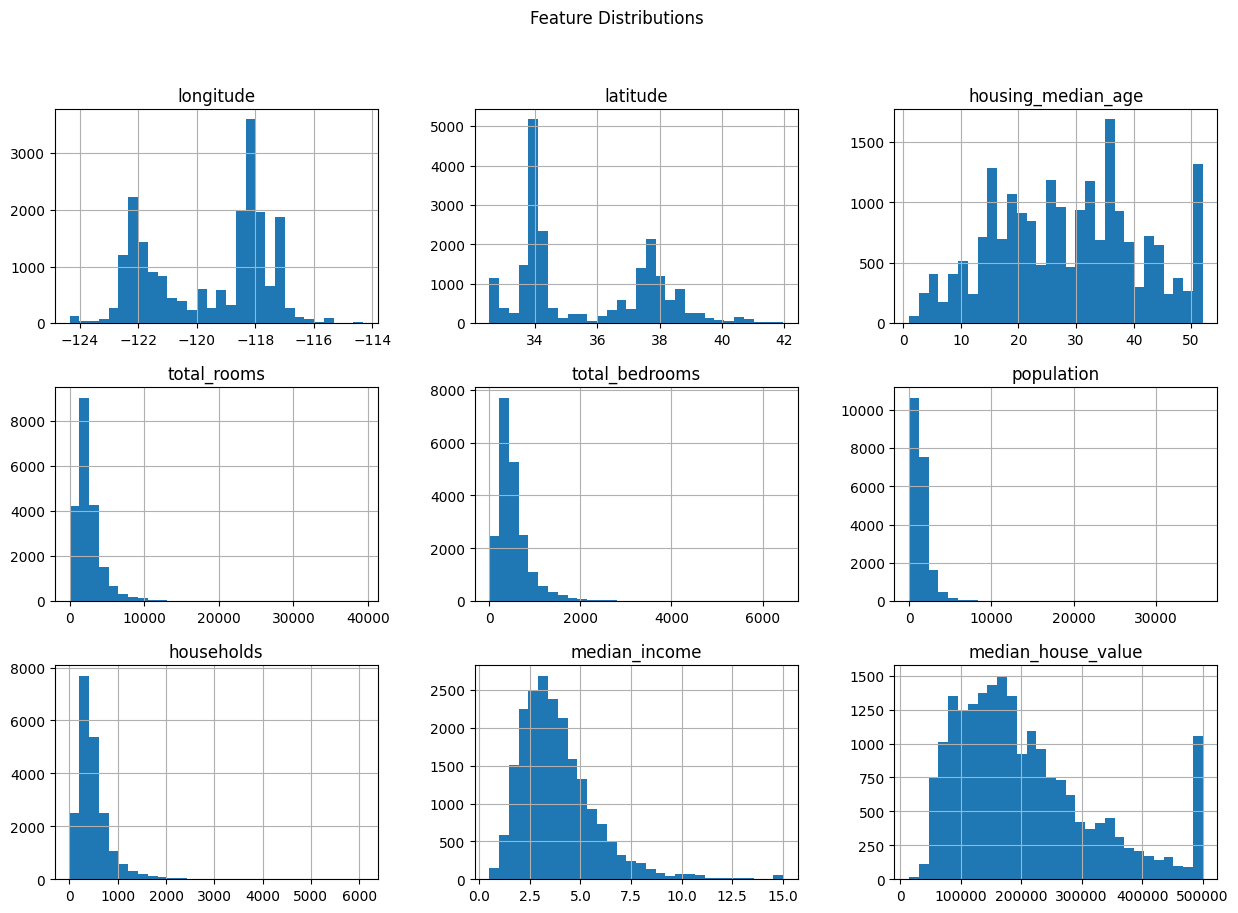

In [21]:
# Plot histograms for all features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Feature Distributions')
plt.show()

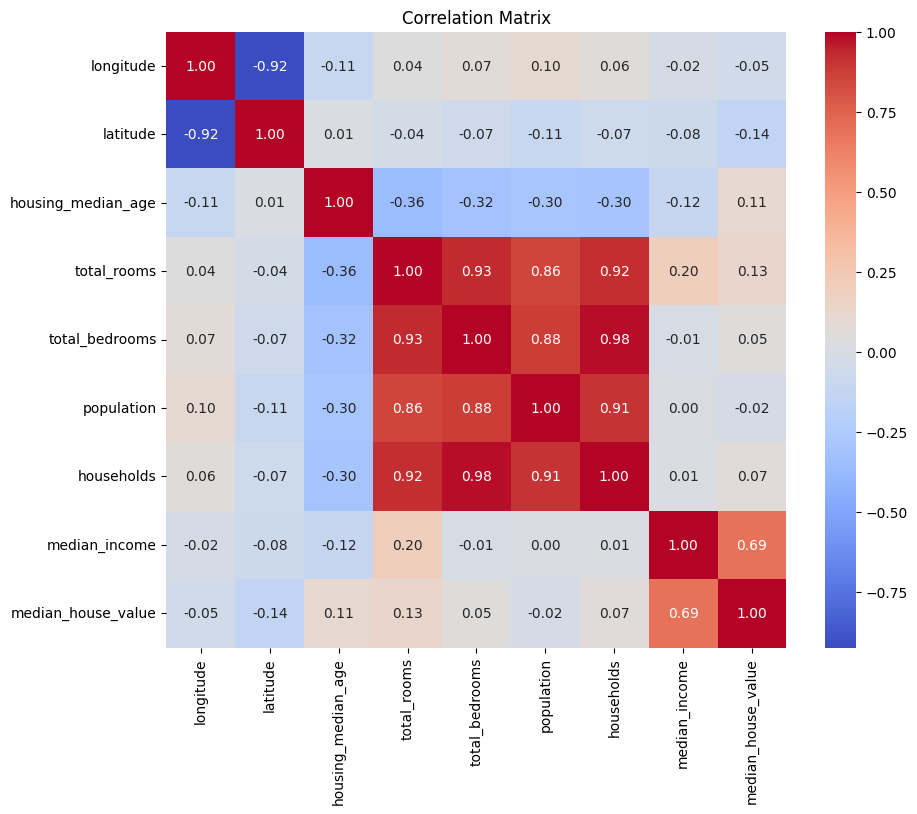

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

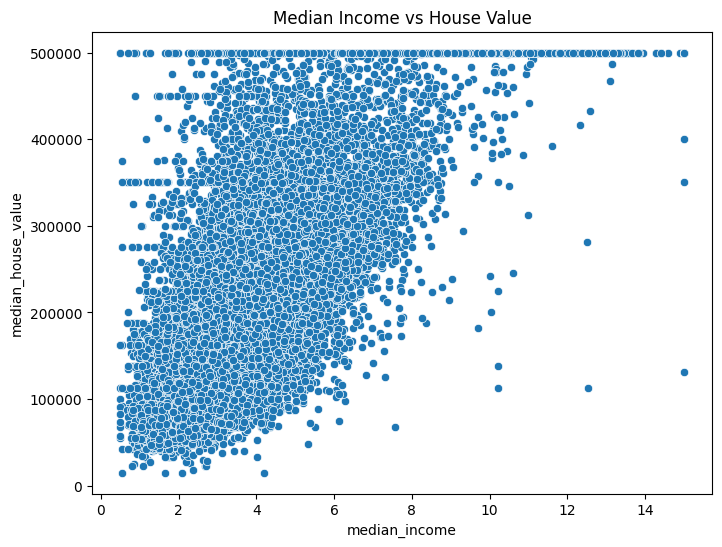

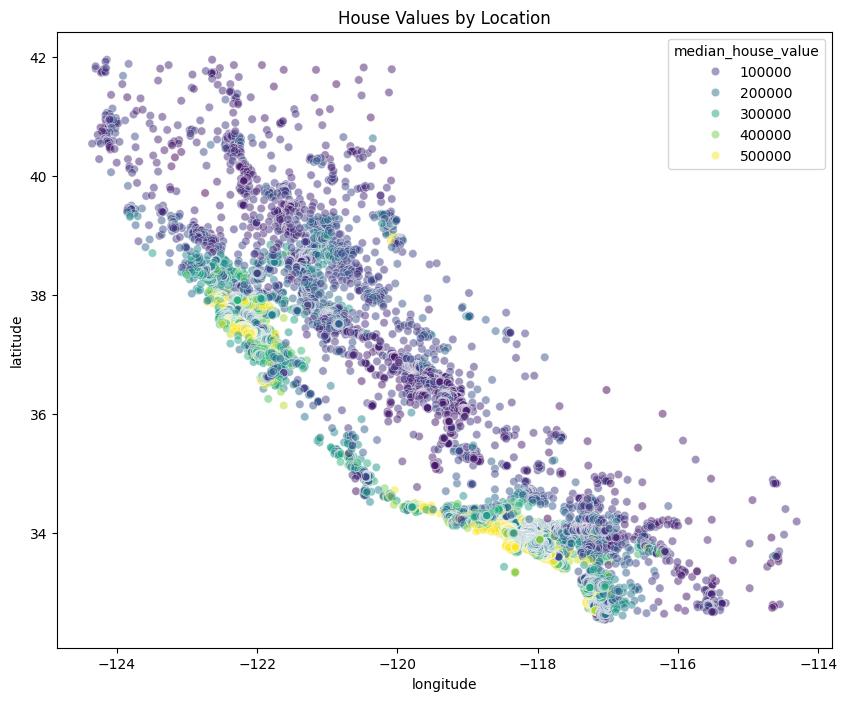

In [25]:
# Scatter plot: MedInc vs MedHouseVal
plt.figure(figsize=(8, 6))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median Income vs House Value')
plt.show()

# Bonus: Geographic plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='viridis', alpha=0.5)
plt.title('House Values by Location')
plt.show()

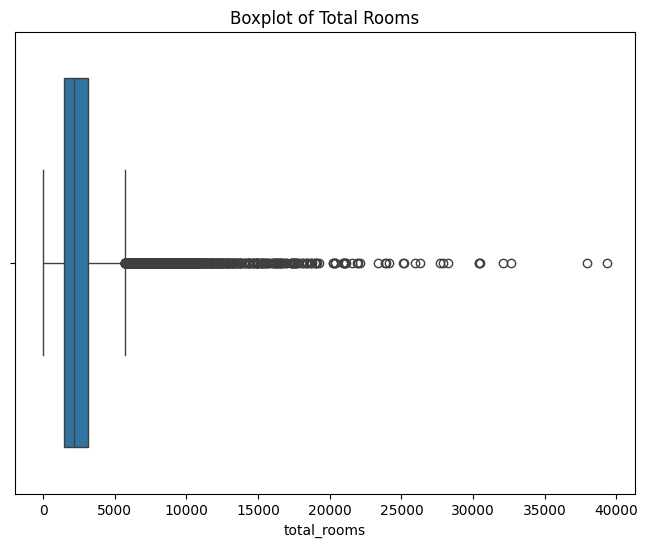

Potential Outliers in total_rooms: 1758


In [27]:
# Boxplot for total_rooms
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['total_rooms'])
plt.title('Boxplot of Total Rooms')
plt.show()

# Count outliers
outliers = df[df['total_rooms'] > 5000]
print("Potential Outliers in total_rooms:", len(outliers))

## Data Preprocessing

**Steps**:
- Handle outliers (cap extreme values in `total_rooms`, `total_bedrooms`).
- Scale numeric features.
- Separate features and target.

In [28]:
# Cap outliers
df['total_rooms'] = np.where(df['total_rooms'] > 5000, 5000, df['total_rooms'])
df['total_bedrooms'] = np.where(df['total_bedrooms'] > 1000, 1000, df['total_bedrooms'])

# Verify
print("After capping outliers:")
df[['total_rooms', 'total_bedrooms']].describe()

After capping outliers:


,total_rooms,total_bedrooms
count,20640.000000,20640.000000
mean,2390.494719,489.516473
std,1286.575929,259.214899
min,2.000000,1.000000
25%,1447.750000,295.000000
50%,2127.000000,435.000000
75%,3148.000000,647.000000
max,5000.000000,1000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [30]:
# Separate features and target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features Preview:")
X_scaled.head()

Scaled Features Preview:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327835,1.052548,0.982143,-1.174071,-1.390835,-0.974429,-0.977033,2.344766
1,-1.322844,1.043185,-0.607019,2.028305,1.969393,0.861439,1.669961,2.332238
2,-1.332827,1.038503,1.856182,-0.717810,-1.155504,-0.820777,-0.843637,1.782699
3,-1.337818,1.038503,1.856182,-0.867824,-0.981898,-0.766028,-0.733781,0.932968
4,-1.337818,1.038503,1.856182,-0.593446,-0.808293,-0.759847,-0.629157,-0.012881


## Model Selection and Training

**Approach**:
- Starting with Linear Regression (simple, interpretable).
- Maybe Try Random Forest for non-linear patterns.
- Use 80/20 train-test split.

In [31]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

Train Shape: (16512, 8)
Test Shape: (4128, 8)


In [32]:
# Train Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression - MSE: {lr_mse:.2f}, RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")

Linear Regression - MSE: 4826530712.42, RMSE: 69473.24, R²: 0.63


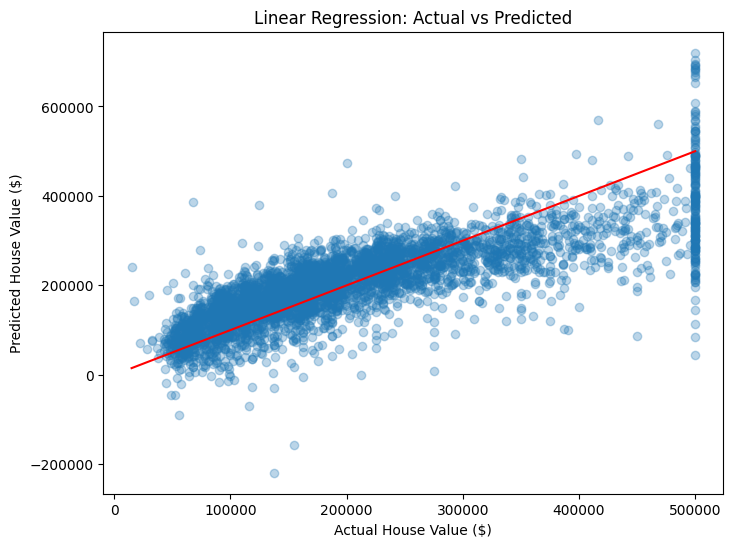

In [33]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lr_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual House Value ($)')
plt.ylabel('Predicted House Value ($)')
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - MSE: {rf_mse:.2f}, RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")

Random Forest - MSE: 2476131110.55, RMSE: 49760.74, R²: 0.81


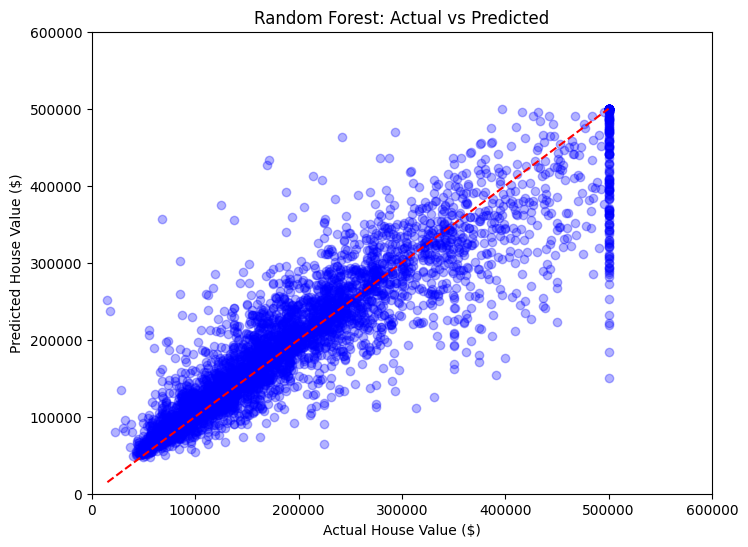

In [35]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, alpha=0.3, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual House Value ($)')
plt.ylabel('Predicted House Value ($)')
plt.xlim(0, 600000)  # Adjust based on your data range
plt.ylim(0, 600000)
plt.show()

## Next Time - Model Iteration and Improvements

**Issues Identified**:
- Linear Regression struggles with non-linear patterns and high-value predictions.
- Target skewness and outliers impact performance.

**Improvements**:
- Log-transform the target to reduce skewness.
- Add feature engineering (e.g., `rooms_per_household`).
- Try Random Forest for non-linear modeling.